In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize, least_squares

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_Sigmainv, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from models import LS, CG

Does CG have more evidence because there are fewer parameters?

### **Cauchy evidence**

In [2]:
def cauchy(X, theta=1):
    return np.log(theta/(theta**2 + X**2))

In [3]:
# nk = nk_live(500)
nk = nk_dead_live(500, 500)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)

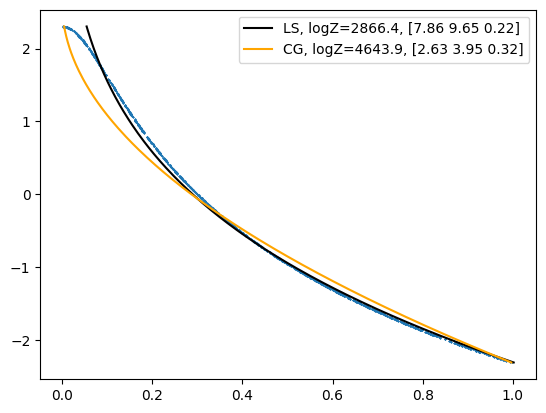

In [5]:
X = generate_Xs(nk)
y = cauchy(X, 0.1)
ls = LS(y, full, mean_X)
cg = CG(y, full, mean_X, covinv_X)
x0 = [5, 6, 0.1]
bounds = ((y.max(), np.inf), (1, np.inf), (1e-7, np.inf))
theta_l = ls.minimise(x0, bounds=None)
theta_c = cg.minimise(x0, bounds=None)
plt.plot(X, y, 'x', ms=1)
plt.plot(full.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(full.inverse(y, theta_c), y, color='orange', ms=1, label=f'CG, logZ={cg.logZ(theta_c):.1f}, {np.round(theta_c, 2)}')
plt.legend();

In [19]:
X = generate_Xs(nk)
y = cauchy(X, 0.1)
ls = LS(y, full, mean_X)
lsf = LS(y[:100], full, mean_X[:100])

(-2.5, -1.5)

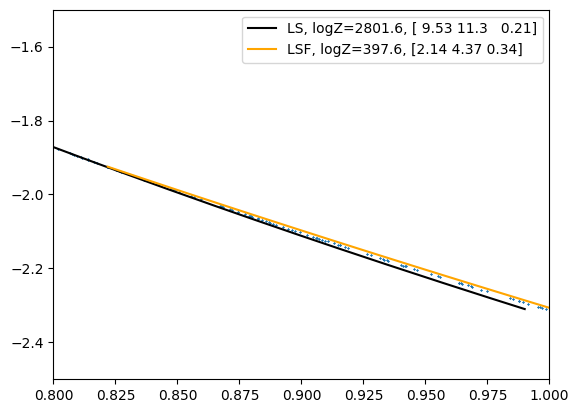

In [20]:
x0 = [8, 10, 0.1]
theta_l = ls.minimise(x0)
theta_lf = lsf.minimise(x0)
theta_l, theta_lf
plt.plot(X, y, 'x', ms=1)
plt.plot(full.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(full.inverse(y[:100], theta_lf), y[:100], color='orange', ms=1, label=f'LSF, logZ={lsf.logZ(theta_lf):.1f}, {np.round(theta_lf, 2)}')
plt.legend()
plt.xlim(0.8, 1)
plt.ylim(-2.5, -1.5)